<a href="https://colab.research.google.com/github/Pradyumna9452/capstone-project-2/blob/main/Bike_Sharing_Demand_Prediction_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **The goal is to turn data into information and information into insight — Carly Fiorina**

#Importing libraries

In [4]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb



# Data Initialization

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/MyDrive/csvfile/SeoulBikeData.csv'

bike_data = pd.read_csv(file_path, encoding= 'unicode_escape')

# **Exploratory Data Analysis**

### Taking a quick look at our Data

In [7]:
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# dat description for the info
bike_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


Looking at Rented bike count, mean is higher than median. So, we got to know there can be outliers.

In [9]:
#reading no of row and column
bike_data.shape

(8760, 14)

#Changing column names into simple column names

In [10]:
# all the column or feature
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
#rename column
bike_data = bike_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

Simplifying column names for ease of reading.

#Finding categorical features in our dataset.

In [12]:
#To find out categorical features in our dataset
bike_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [13]:
print(bike_data.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [14]:
# see all the date or diffrent sesaons and holiday and functioning day
print(bike_data['Seasons'].unique())
print(bike_data['Holiday'].unique())
print(bike_data['Functioning_Day'].unique())
print(bike_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


There are 14 columns. 10 are numerical and 4 are categorical columns. 'date' column has multiple information, extracting those informations can be insightful.

#Checking for null values

In [15]:
# data information for null value
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [16]:
# checkng for no null value
bike_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

### Hooray! Dataset has no null

#Extracting features from date

In [17]:
#extarcting all usefull from date formate
bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['Month']= pd.DatetimeIndex(bike_data['Date']).month
bike_data['weekday']=pd.DatetimeIndex(bike_data['Date']).weekday

In [18]:
# data after date time extraction
bike_data.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [19]:
display(bike_data['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

In [20]:
#weekday is in range 0-6, so we need to make it to normal 1-7
bike_data['weekday'] = np.array(bike_data['weekday'])+1
display(bike_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [21]:
# Rented_bike_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
# Rented_bike_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
# Rented_bike_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bike_per_Weekday= pd.DataFrame(bike_data['Rented_Bike_Count'].groupby(by=bike_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [22]:
# read the data for the year
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [23]:
# year mont count from the data set
bike_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [24]:
bike_data['Months_string'] = bike_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [25]:
import plotly.express as px

In [26]:
#line plot for the month_year group
month_year_group= bike_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

In [27]:
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


As we can see, Rented bike count was very low in 2017.

In the year 2018, We can see a sharp increase in Rented bike count.

Highest Demand for rented bike is in midyear (may, june, july)

### Checking distribution of our dependent variable

In [28]:
# histogram  plot for the rented bike and year
px.histogram(bike_data, x="Rented_Bike_Count",marginal="violin",color='Year')

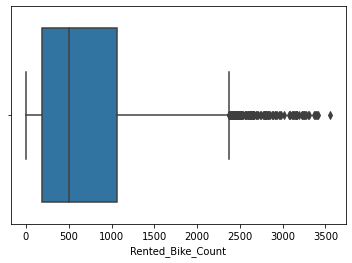

In [29]:
sns.boxplot(x = bike_data['Rented_Bike_Count'])

In [30]:
#square root transformation
px.histogram(bike_data, x=np.sqrt(bike_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

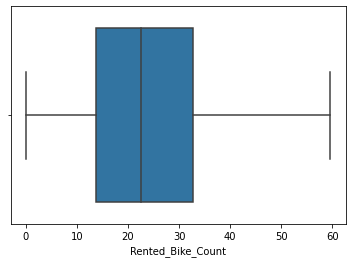

In [31]:
sns.boxplot(x = np.sqrt(bike_data["Rented_Bike_Count"]))

### Our Model works best when we have normal distribution. Normal distribution for model building as it makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal.

#Exploring Categorical variables

In [32]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

**Counting no. of sections in categorical features in dataset**

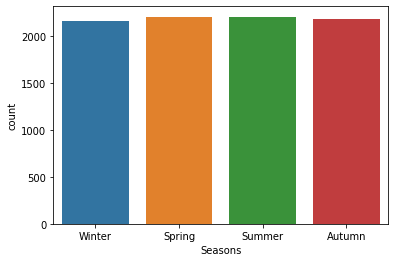

In [33]:
#count plot for diffrent seasons
sns.countplot(x ='Seasons', data = bike_data)

In our dataset, information about all months are given.

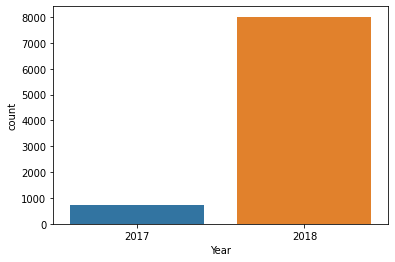

In [34]:
#comment for countplot for year
sns.countplot(x ='Year', data = bike_data)


Our dataset mostly contains information of year 2018 and very little information of year 2017.

**Finding relation between variables USING BAR PLOT**

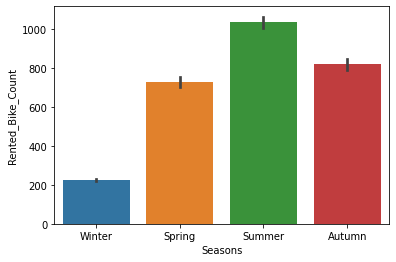

In [35]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


Rented bike count is less in winter and almost consistantly higher in other months.

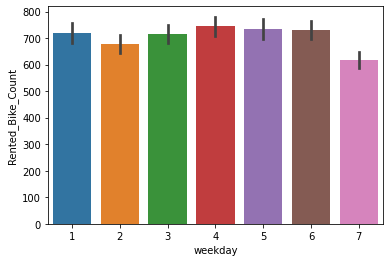

In [36]:
#plot for the rented bike forweekday
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')


In all days, rented bike count is consistant and equal.

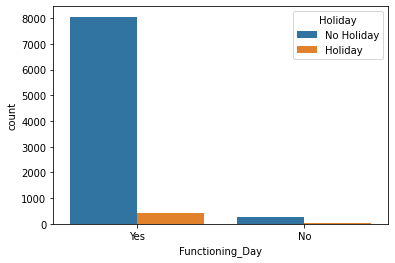

In [37]:
#holiday or not holiday plot
sns.countplot(x ='Functioning_Day',hue = 'Holiday', data = bike_data)


### We got to know all Holidays are falling into functioning days.

# **The world is now awash with Data and we can see consumers in a lot clearer.**

#Exploring Numerical Variables

In [38]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [39]:
#selecting numerical features
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [40]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [41]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

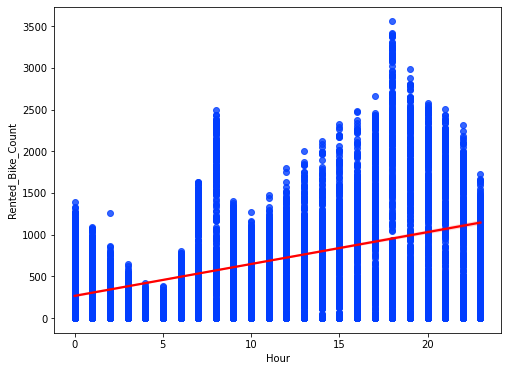

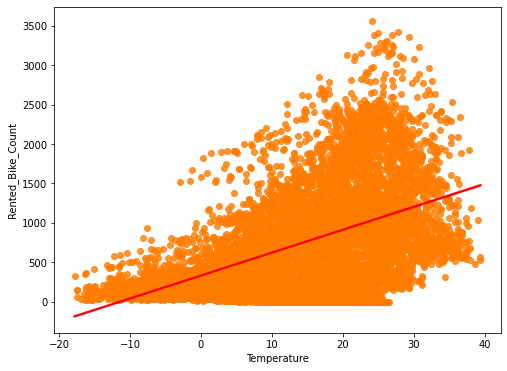

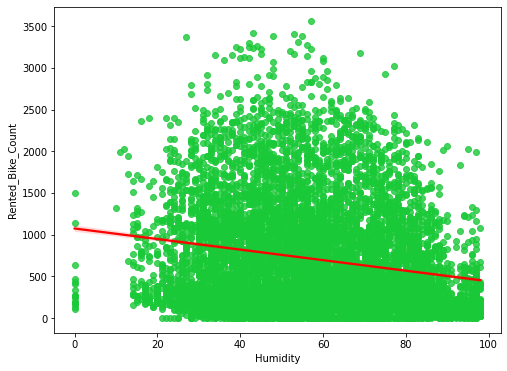

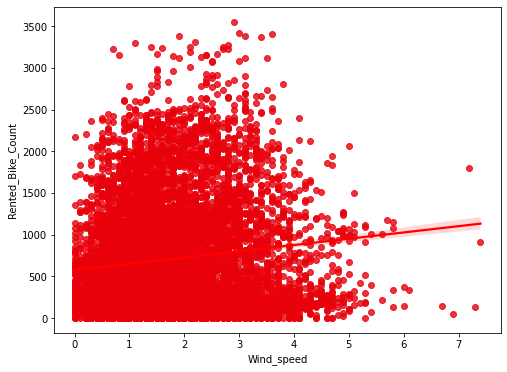

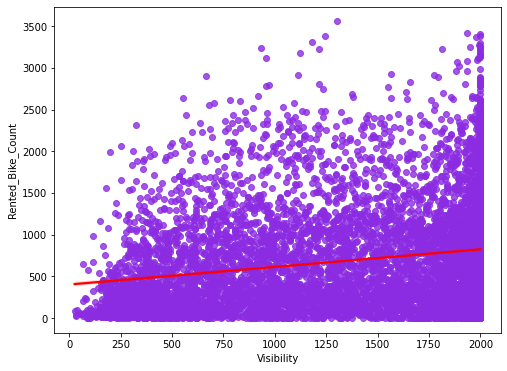

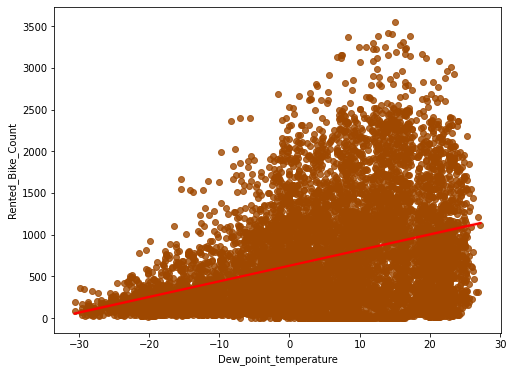

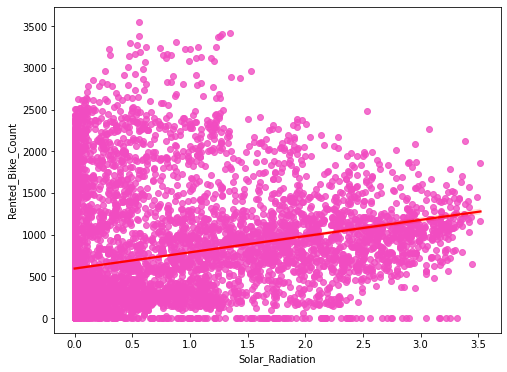

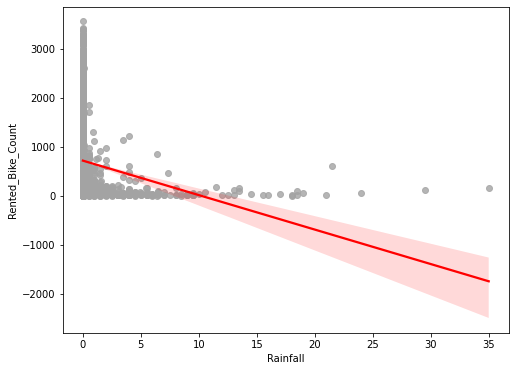

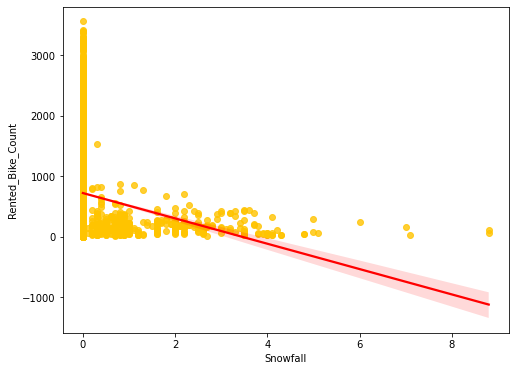

In [42]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

### **Effects of Numerical features in rented bike count:-**

* **Hour:** Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

* **Temperature :** Temperature is positively correlated. Rented bike count is highest between 20 °C and 30 °C. So, it means temperature has an effect.

* **Humidity :** 
Humidity is the amount of water vapor in the air. So, People preferring to borrow bike When there is less humidity.

* **Wind_speed :**
wind speed doesn't affect our data much.

* **Visibility:**
Visibility doesn't affect our results much but all we know is that it is positively correlated with bike count.

* **SnowFall and Rainfall:**
People don't prefer borrowing bike, where there is rainfall or snowfall.

* **Dew point:**
The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.

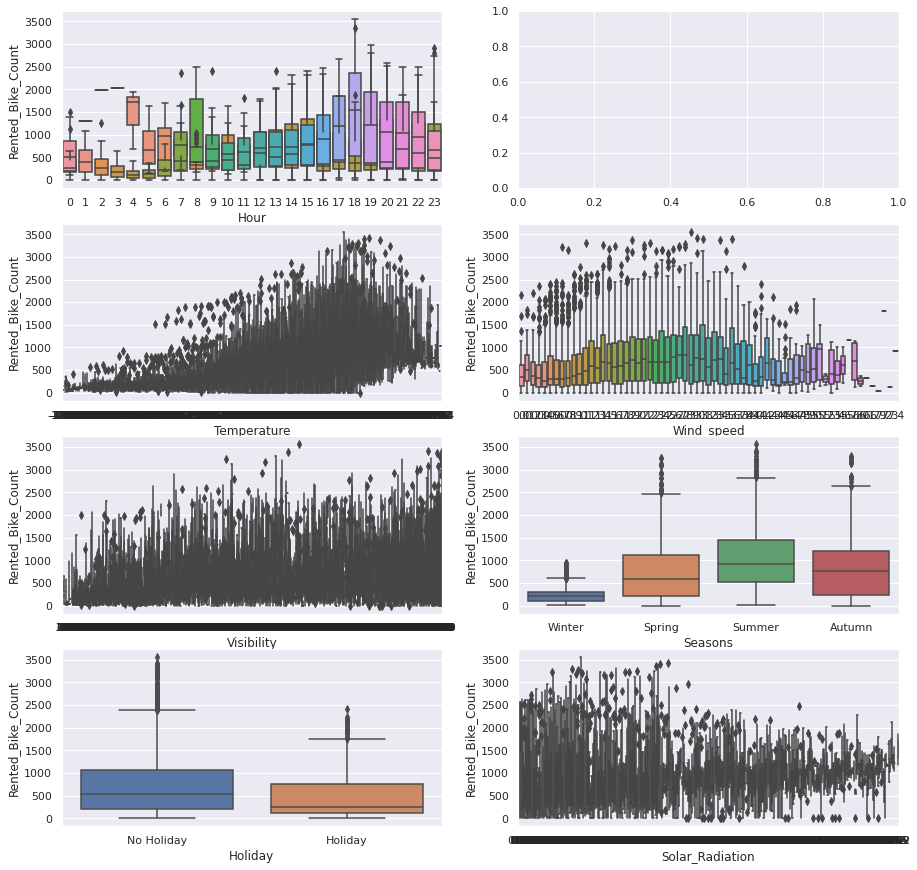

In [43]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])

### Finding Correlation of Dependent variable with other variables

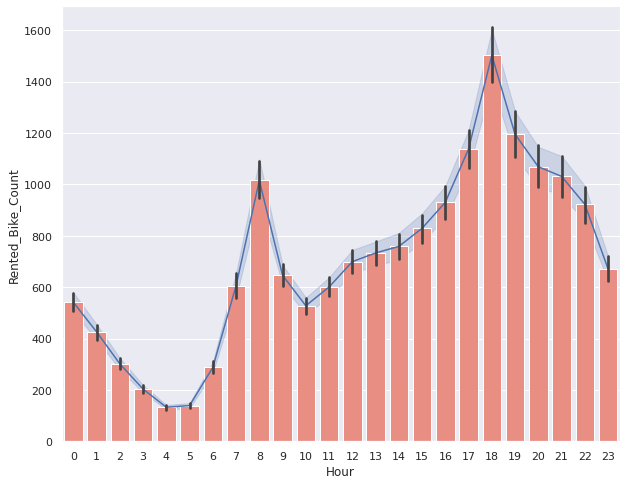

In [44]:
# bar plot between hr and rented bike count
plt.figure(figsize=(10,8))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'])
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'], color="salmon")


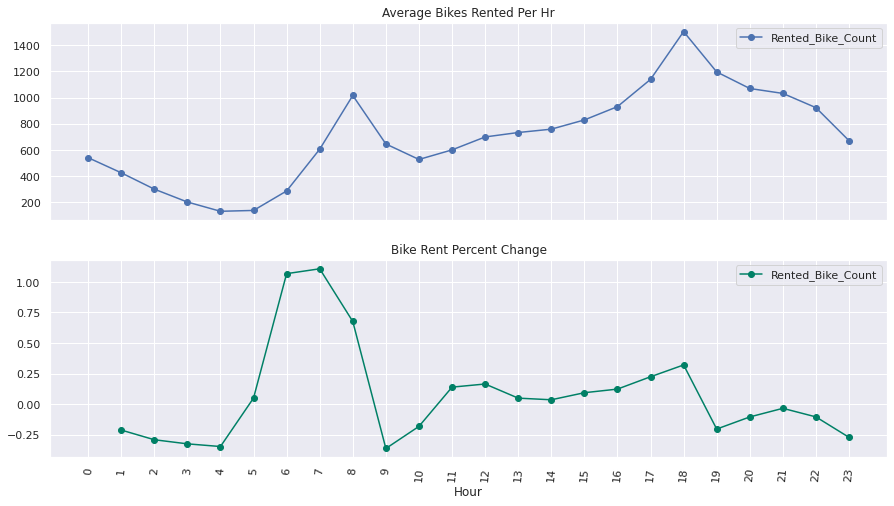

In [45]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))

Consumers are renting bikes more in specific hours of a day. In morning it is 7:00 to 9:00 and then in evening from 15:00 to 19:00. 

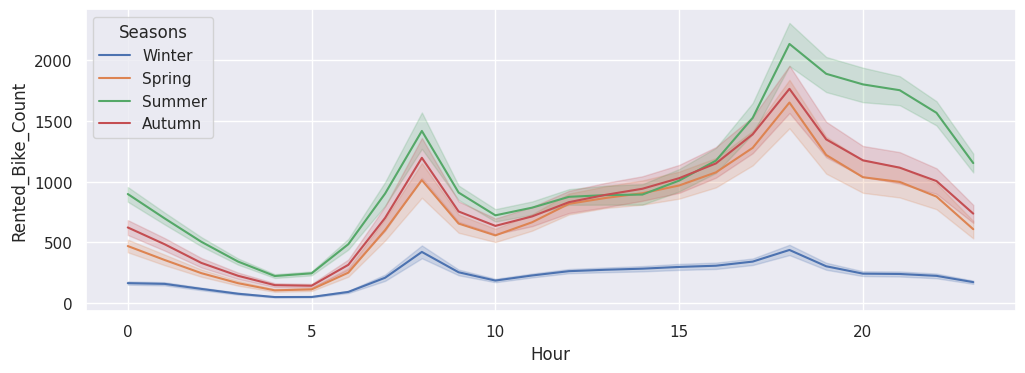

In [46]:
# line plot seasonal varaition
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=bike_data, x="Hour", y="Rented_Bike_Count", hue="Seasons")

There is an Amazing insight that consumers prefer borrowing bikes more in a particular season. Rented bike count is highest in summer and least in winter.

### **Relational Analysis - Find correlation betwwen different variables**

In [47]:
#correlation data
np.round(bike_data.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Year                     0.215
Day                      0.047
Month                    0.071
weekday                 -0.022
Name: Rented_Bike_Count, dtype: float64

Hour and temperature are highly correlated with bike count. 

**let's drop some columns which are not important**

In [48]:
# dropping the non-perfoming column
bike_data.drop('Months_string',axis=1,inplace=True)
bike_data.drop('Date',axis=1,inplace=True)

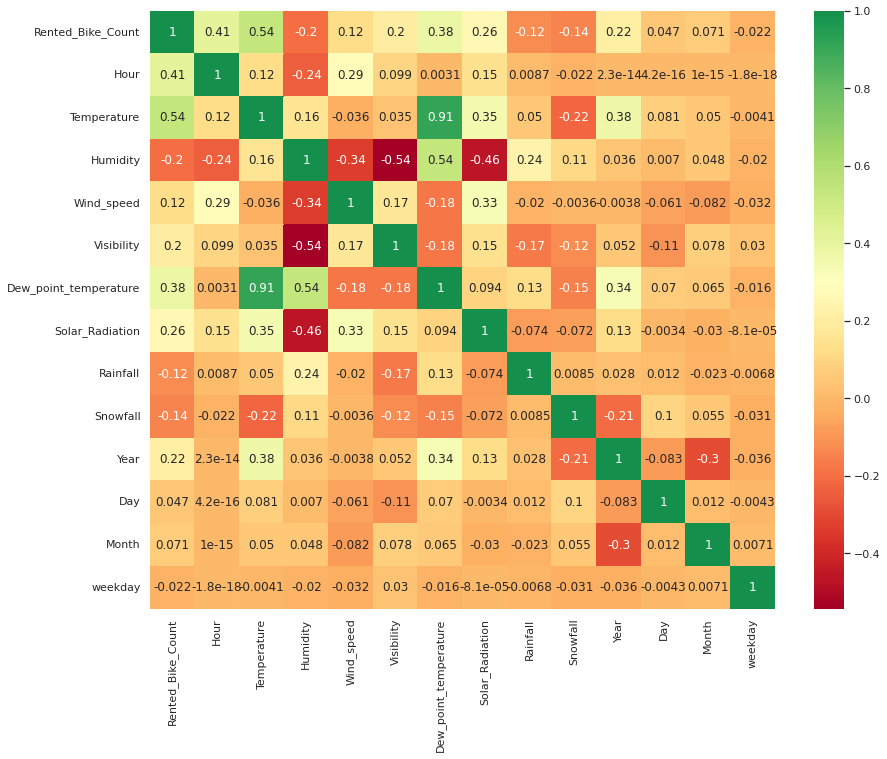

In [49]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

Temperature and Dew point temperature are highly correlated. We can add them to make one single column


In [50]:
# creating new  feature
bike_data['Temperature_and_DP_Temp'] = [bike_data['Temperature'][i]+bike_data['Dew_point_temperature'][i] for i in range(len(bike_data))]
bike_data.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)


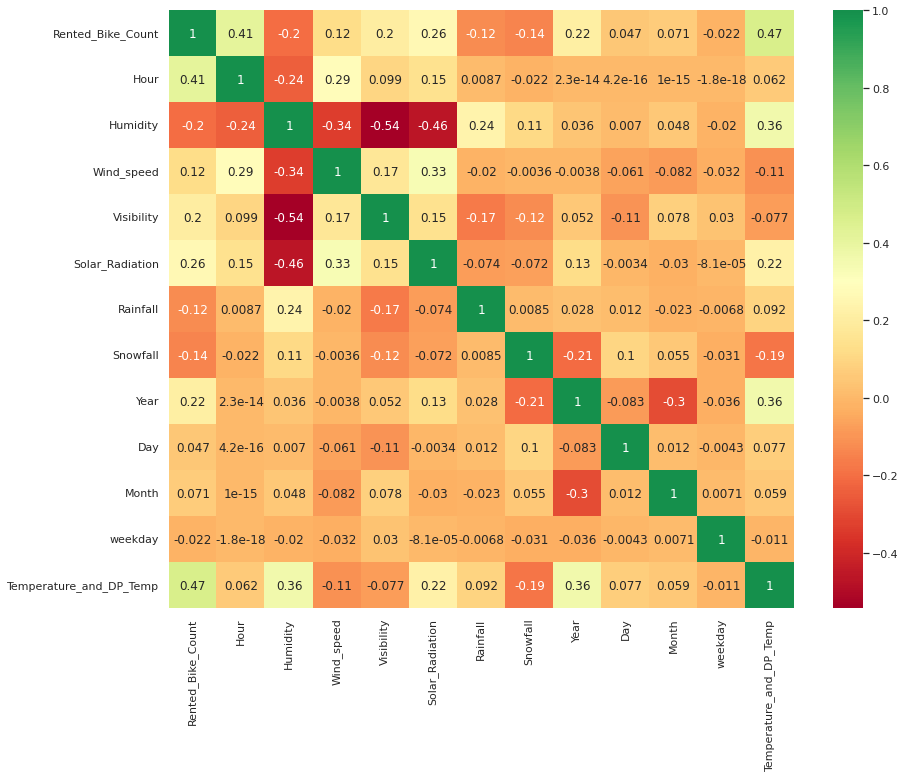

In [51]:
#correlation plot
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

# **Data are just summaries of thousand of stories.**

In [52]:
#creating dummies column for the given feature
bike_data=pd.get_dummies(bike_data,drop_first=True)


In [53]:
# table after feature engineering
bike_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,weekday,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,4,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,4,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,4,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,4,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,4,-24.6,0,0,1,1,1


In [54]:
# removing less importance column
bike_data.drop('weekday',axis=1,inplace=True)

In [55]:
bike_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,-24.6,0,0,1,1,1


In [56]:
# shape of the data
bike_data.shape

(8760, 17)

Our Dataset is ready.

# **Model Building**

In [57]:
# Data for all the independent variables
X = bike_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bike_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [58]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [59]:
print(model.feature_importances_)


[0.26674962 0.12061441 0.01409494 0.03037315 0.05549922 0.03240323
 0.00259073 0.00133161 0.01843902 0.01658426 0.0682488  0.01620099
 0.00919657 0.18194059 0.00544289 0.16028996]


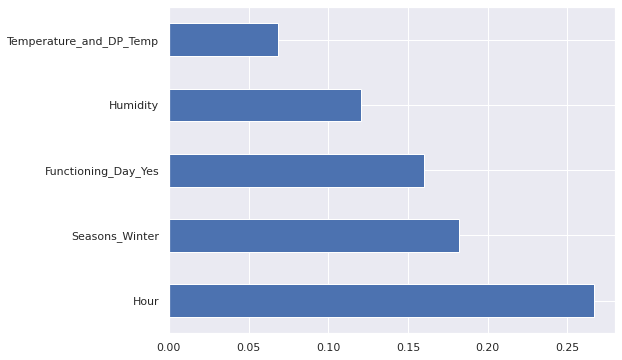

In [60]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#Train Test Split Model

In [61]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [62]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [63]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


## **In this project we are using four model on our data set for getting best performance:-**

LINEAR REGRESION 

LASSO REGRESSION

RIDGE REGRESSION

GRADIENT BOOSTING

DECISION TREE

RANDOM FORREST 

XGBOOST

#Linear Regression Model

For linear regression we have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:(rewrite)

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent

In [64]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [65]:
# all coeffient
reg.score(X_train, y_train)

0.6547192361864398

In [66]:
#diffresnt coefficient for different features
reg.coef_

array([ 4.87925477e-01, -2.29940503e-01,  1.89672962e-01, -1.56414191e-04,
       -8.02486527e-01, -1.39558289e+00,  1.86527269e-01, -2.64795650e+00,
       -1.86084876e-02, -2.30326900e-02,  2.47906155e-01, -2.89868003e+00,
       -2.84332142e+00, -9.04145095e+00,  2.85999149e+00,  2.84894893e+01])

In [67]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [68]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [69]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098533
RMSE : 7.4220883214217634
R2 : 0.6588467149667641
Adjusted R2 : 0.6557006327993107


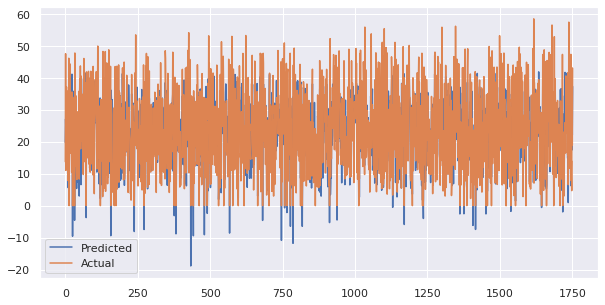

In [70]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

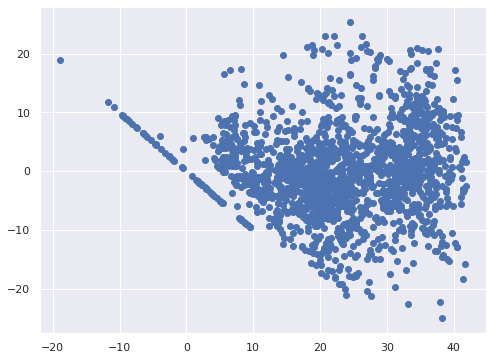

In [71]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

## **In the end, you should only measure and look at the numbers that drive action, meaning that the data tells you what you should do next. - ALEX PEINIGEER**

# Implementing lasso Regression

In [72]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [73]:
# lasso score 
lasso.score(X_train, y_train)

0.6436819185266032

In [74]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [75]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.64834166119503
RMSE : 7.392451667829492
R2 : 0.6436819185266032
Adjusted R2 : 0.6403959880922664


In [76]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.49564641514416
RMSE : 7.582588371733241
R2 : 0.643932543343507
Adjusted R2 : 0.6406489241466748


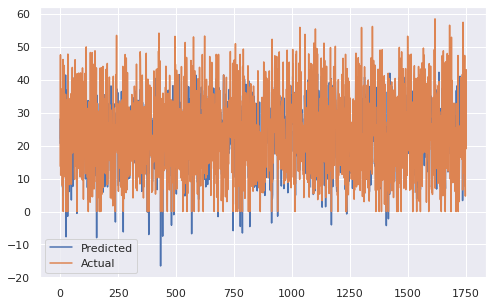

In [77]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

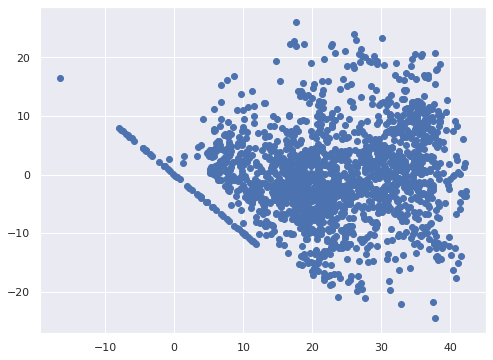

In [78]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# Implementing Ridge Regression

In [79]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [80]:
# ridge score
ridge.score(X_train, y_train)

0.6547191910419368

In [81]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [82]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.955560208927636
RMSE : 7.277057111836325
R2 : 0.6547191910419368
Adjusted R2 : 0.6515350452532745


In [83]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08773606712857
RMSE : 7.422111294445036
R2 : 0.6588446030720665
Adjusted R2 : 0.655698501428927


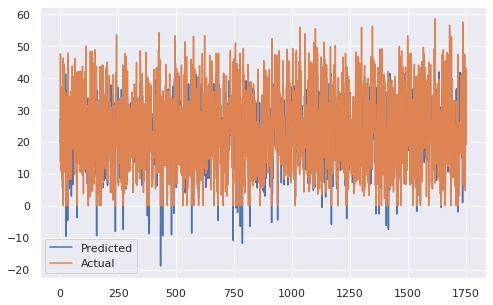

In [84]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

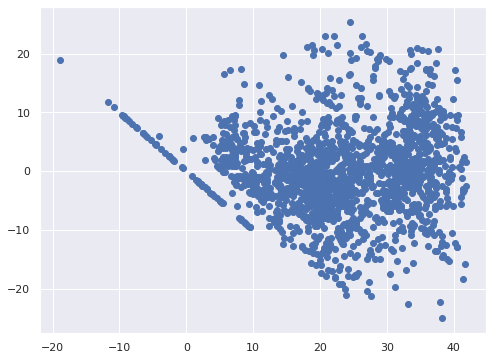

In [85]:
# Heteroscedasticity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# Implementing Elastic Net Regressor

In [86]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#a*l1+b*l2
#alpha=a+b and l1 ratio=a/a+b
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [87]:
#elastic net score

elasticnet.score(X_train, y_train)

0.5801724303474118

In [88]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [89]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.38876290053423
RMSE : 8.024260894346234
R2 : 0.5801724303474118
Adjusted R2 : 0.5763008216359182


In [90]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 67.17969621593292
RMSE : 8.196322115188796
R2 : 0.5839597419629589
Adjusted R2 : 0.5801230594680928


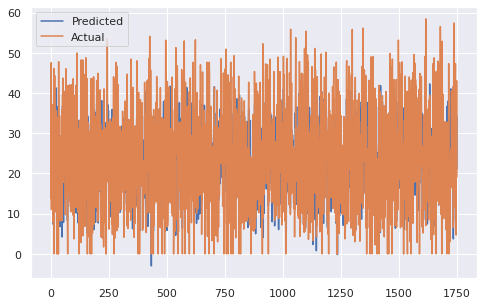

In [91]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

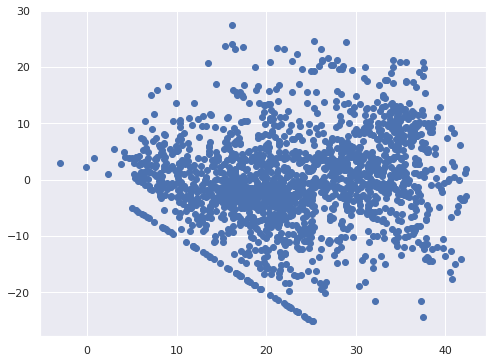

In [92]:
#Heteroscedasticity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# Implementing of decision tree by using decision tree regressor

In [93]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [94]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [95]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8422505813881929
MSE : 24.19395639285443
RMSE : 4.9187352432159255
R2 : 0.8422505813881929
Adjusted R2 : 0.8407958317064701


In [96]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.19234438157664
RMSE : 5.761279752066952
R2 : 0.7944415902540158
Adjusted R2 : 0.7925459507405082


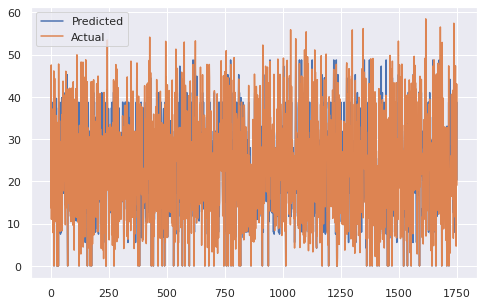

In [97]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

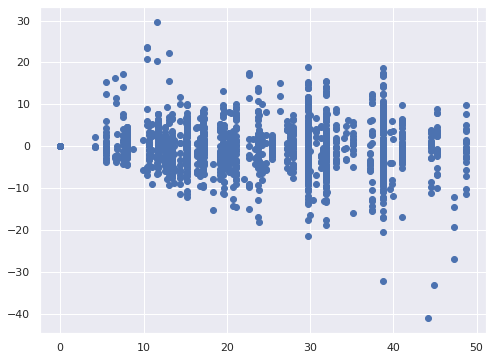

In [98]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

# Visualization of decision tree

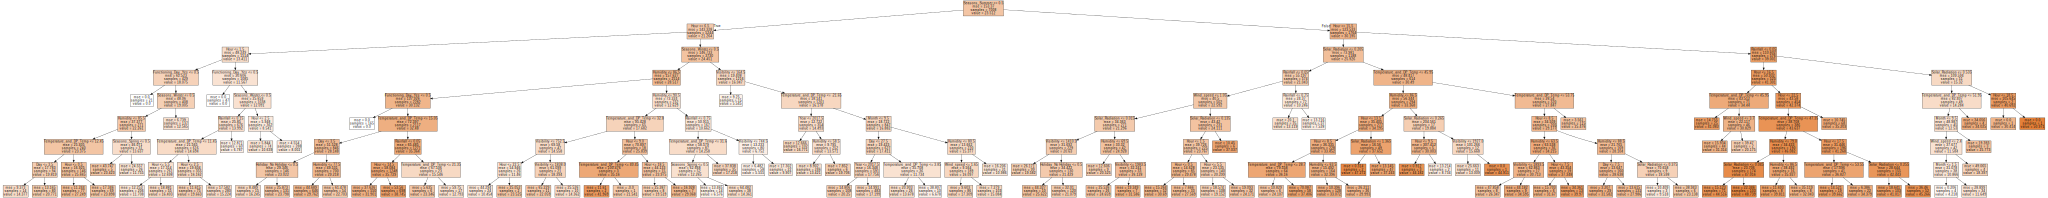

In [99]:
# decision tree visualization
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

# Implementing Random forest Rergressor

In [100]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [102]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.987271312634767
MSE : 1.9521929764480028
RMSE : 1.397208995264489
R2 : 0.987271312634767
Adjusted R2 : 0.9871539299270761


In [103]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9103078654213875
MSE : 14.48295023750632
RMSE : 3.8056471509463825
R2 : 0.9103078654213875
Adjusted R2 : 0.9094807333445819


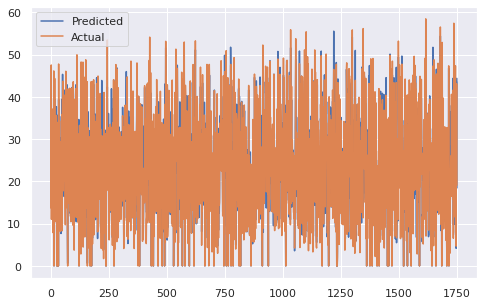

In [104]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

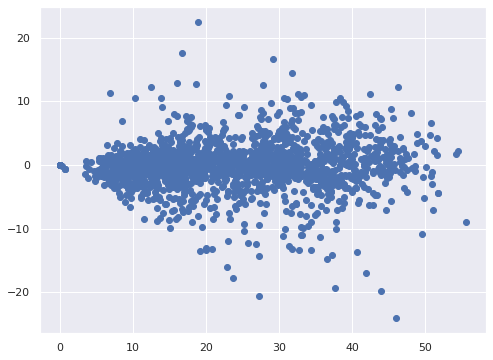

In [105]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [106]:
# random forest important feature selection
rf_model.feature_importances_

array([0.28647708, 0.14229927, 0.01314215, 0.01497041, 0.02346607,
       0.03210392, 0.0017056 , 0.00107765, 0.01691082, 0.0112404 ,
       0.09984065, 0.00638186, 0.00409692, 0.17804294, 0.00256866,
       0.16567561])

In [107]:
importance_rf=rf_model.feature_importances_

In [108]:
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)

In [109]:
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)

In [110]:
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)


,Feature,Feature importance
0,Hour,0.29
13,Seasons_Winter,0.18
15,Functioning_Day_Yes,0.17
1,Humidity,0.14
10,Temperature_and_DP_Temp,0.10
5,Rainfall,0.03
4,Solar_Radiation,0.02
8,Day,0.02
2,Wind_speed,0.01
3,Visibility,0.01


In [111]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [112]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

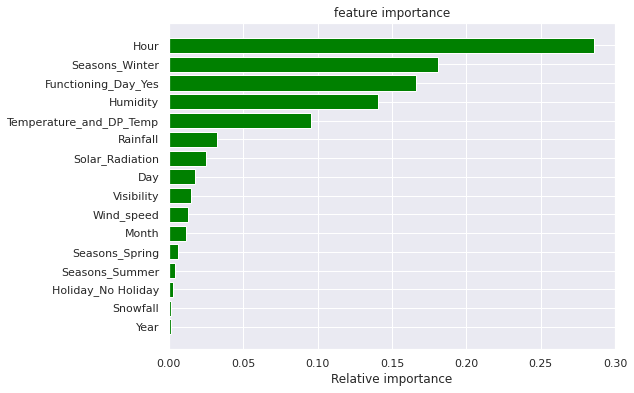

In [113]:
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()         

# Training Random forest Regressor from GridesearchCV 

In [114]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [115]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

# Importing Random forest Regressor

In [116]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [117]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [118]:
rf_optimal_model = rf_grid.best_estimator_

In [119]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [120]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [121]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8434168687805078
MSE : 24.015083427365777
RMSE : 4.900518689625189
R2 : 0.8434168687805078
Adjusted R2 : 0.841972874486841


In [122]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8434168687805078
MSE : 27.128544928940933
RMSE : 5.208506976950394
R2 : 0.8319943752629053
Adjusted R2 : 0.830445043853226


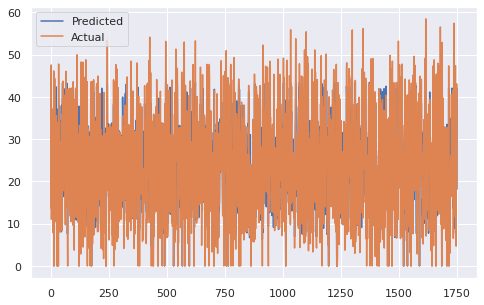

In [123]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_r_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [124]:
# for the important features
rf_optimal_model.feature_importances_

array([3.15340574e-01, 1.49927730e-01, 2.00684637e-04, 1.21088795e-03,
       5.09769697e-03, 2.01725549e-02, 4.09125354e-04, 7.71609951e-04,
       4.45910624e-03, 9.88499281e-04, 8.45938325e-02, 2.45682210e-03,
       4.67579643e-03, 2.20406759e-01, 4.88707059e-04, 1.88799614e-01])

In [125]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [126]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [127]:
#reading table of important features
imortance_rf_gddf.head()

,Feature,Feature importance
0,Hour,0.32
1,Humidity,0.15
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.01


In [128]:
#featuer in ascending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

,Feature,Feature importance
0,Hour,0.32
13,Seasons_Winter,0.22
15,Functioning_Day_Yes,0.19
1,Humidity,0.15
10,Temperature_and_DP_Temp,0.08
5,Rainfall,0.02
4,Solar_Radiation,0.01
2,Wind_speed,0.00
3,Visibility,0.00
6,Snowfall,0.00


In [129]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [130]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

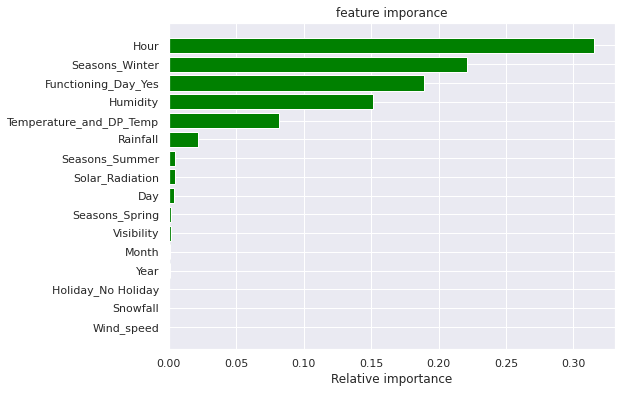

In [131]:
#barh plot for important features 
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  

# Implementing Gradient Boosting Regression

In [132]:
# gradient boosting model import
gbd_model=GradientBoostingRegressor()
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [133]:
# Making predictions on train and test data

y_pred_train_gb = gbd_model.predict(X_train)
y_pred_test_gb = gbd_model.predict(X_test)

In [134]:
# for train data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.883539068956644
MSE : 17.861559883576575
RMSE : 4.226293870943734
R2 : 0.883539068956644
Adjusted R2 : 0.8824650776617197


In [135]:
# for test data set
print("Model Score:",gbd_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.883539068956644
MSE : 20.398081881124558
RMSE : 4.516423571934386
R2 : 0.8736757721855991
Adjusted R2 : 0.8725108225342848


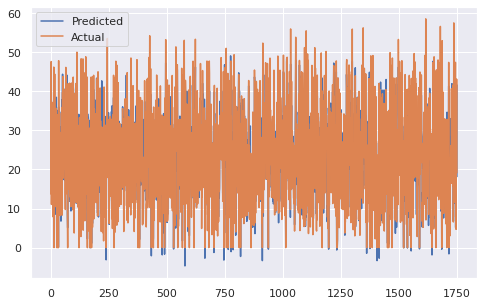

In [136]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

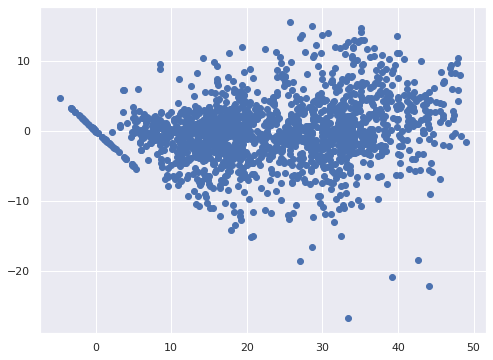

In [137]:
#Heteroscedasticity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

feature importance

In [138]:
#feature importance
gbd_model.feature_importances_

array([0.26789741, 0.11498501, 0.00043032, 0.00188153, 0.02897849,
       0.06974424, 0.00049725, 0.00036667, 0.00903245, 0.00496772,
       0.190921  , 0.00209953, 0.00458441, 0.11376792, 0.00207427,
       0.18777177])

In [139]:
#creating a data frame for important features
importances_gb = gbd_model.feature_importances_

importance_dictgb = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances_gb}

importance_dfgb = pd.DataFrame(importance_dictgb)

In [140]:
importance_dfgb['Feature Importance'] = round(importance_dfgb['Feature Importance'],2)

In [141]:
#reading the important features
importance_dfgb.head()

,Feature,Feature Importance
0,Hour,0.27
1,Humidity,0.11
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.03


In [142]:
importance_dfgb.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Hour,0.27
10,Temperature_and_DP_Temp,0.19
15,Functioning_Day_Yes,0.19
1,Humidity,0.11
13,Seasons_Winter,0.11
5,Rainfall,0.07
4,Solar_Radiation,0.03
8,Day,0.01
2,Wind_speed,0.00
3,Visibility,0.00


In [143]:
gbd_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [144]:
features = X_train.columns
importances =gbd_model.feature_importances_
indices = np.argsort(importances)

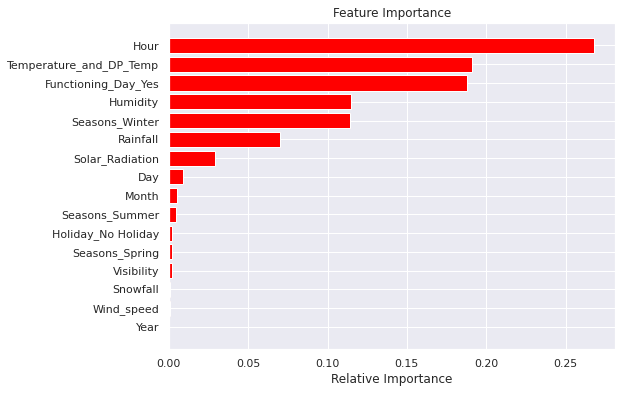

In [145]:
#plot the feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Training Gradient Regressor with GridsearchCV

In [146]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [147]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=100)

In [148]:
gb_optimal_model = gb_grid.best_estimator_

In [149]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 100}

In [150]:
# Making predictions on train and test data

y_pred_train_gd_g = gb_optimal_model.predict(X_train)
y_pred_test_gd_g= gb_optimal_model.predict(X_test)

In [151]:
#gd with grid cv train performance
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9478273897001314
MSE : 8.001689449028065
RMSE : 2.8287257641963217
R2 : 0.9478273897001314
Adjusted R2 : 0.9473462589999597


In [152]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_gd_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_gd_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_gd_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9478273897001314
MSE : 14.178886838796927
RMSE : 3.7654862685710233
R2 : 0.9121909137527177
Adjusted R2 : 0.9113811469631173


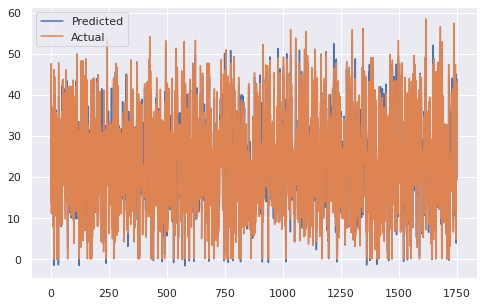

In [153]:
#pred vs actual for Gradient boosting
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_gd_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **Implementing Xgboost Regressor**

In [154]:
# Create an instance of the RandomForestRegressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[10:48:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [155]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [156]:
#xg boost on train data
print("Model Score:",xg_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8802274395883487
MSE : 18.3694629695651
RMSE : 4.285961148863239
R2 : 0.8802274395883487
Adjusted R2 : 0.8791229087718724


In [157]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.012567484151045
RMSE : 4.583946714802763
R2 : 0.8698702957806231
Adjusted R2 : 0.868670252398773


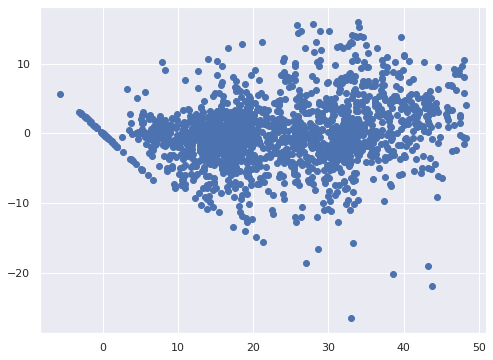

In [158]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg),(y_test)-(y_pred_test_xg))

Feature  importance selction

In [159]:
xg_model.feature_importances_

array([0.06851235, 0.06226207, 0.00113145, 0.00563223, 0.04412329,
       0.08109905, 0.00537752, 0.00349902, 0.00977364, 0.0102376 ,
       0.07346597, 0.00788979, 0.04413204, 0.3727903 , 0.00834093,
       0.20173274], dtype=float32)

In [160]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)

In [161]:
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)

In [162]:
xg_model.fit(X_train,y_train)

[10:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [163]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

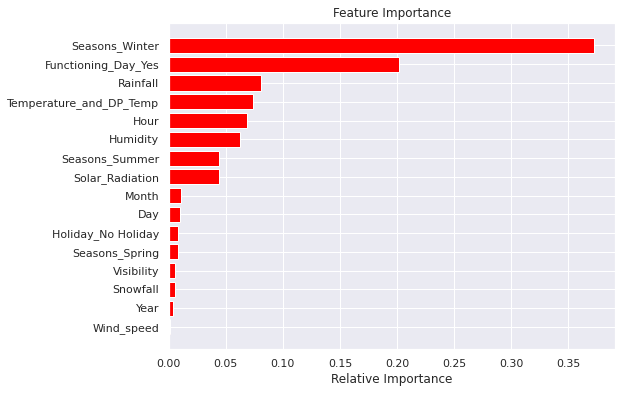

In [164]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Training Xgboost regressor with Gridsearch**

# Provide the range for  Hyperparameter

In [165]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [166]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[10:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [167]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[10:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[10:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[10:48:19] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [168]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [169]:
xg_optimal_model = xg_grid.best_estimator_

In [170]:
xg_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [171]:
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [172]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9770309205417014
MSE : 3.522757241759442
RMSE : 1.8769009674885466
R2 : 0.9770309205417014
Adjusted R2 : 0.9768191019415096


In [173]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9770309205417014
MSE : 13.00960734058643
RMSE : 3.6068833278311665
R2 : 0.9194321990152959
Adjusted R2 : 0.9186892106488664


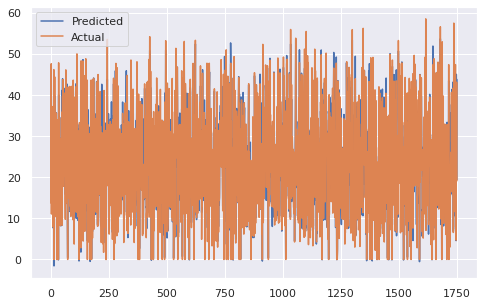

In [174]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

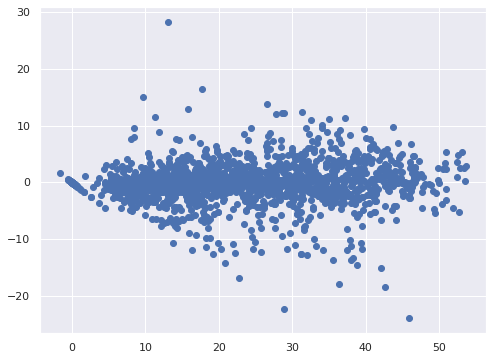

In [175]:
### Heteroscadacity
plt.scatter((y_pred_test_x_g),(y_test)-(y_pred_test_x_g))

# Feature importance wirh xg train

In [176]:
xg_optimal_model.feature_importances_

array([0.03007521, 0.01762952, 0.00109576, 0.0016186 , 0.0064221 ,
       0.02655201, 0.00266114, 0.00265166, 0.00289786, 0.00309629,
       0.01372509, 0.01248075, 0.00401535, 0.56509805, 0.00490237,
       0.30507818], dtype=float32)

In [177]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)

In [178]:
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)

In [179]:
importance_dfxgt.head()

,Feature,Feature Importance
0,Hour,0.03
1,Humidity,0.02
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.01


In [180]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
13,Seasons_Winter,0.57
15,Functioning_Day_Yes,0.31
0,Hour,0.03
5,Rainfall,0.03
1,Humidity,0.02
4,Solar_Radiation,0.01
10,Temperature_and_DP_Temp,0.01
11,Seasons_Spring,0.01
2,Wind_speed,0.00
3,Visibility,0.00


In [181]:
features = X_train.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)

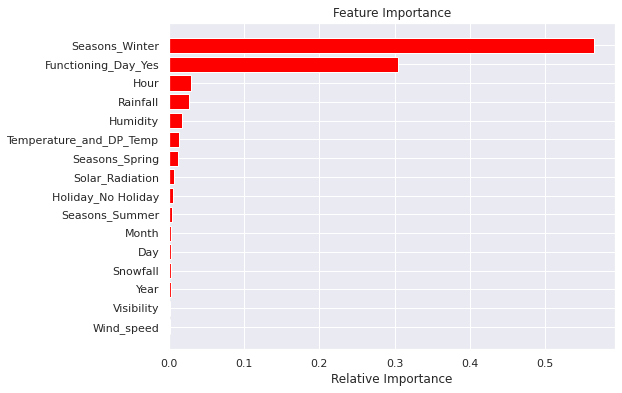

In [182]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# Model Summery for the train data set 

In [183]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','52.95555328513579',' 7.277056636108846','0.6547192361864398',' 0.651535090814095'])
train.add_row(['2','lasso Regression','54.64834166119503','7.392451667829492','0.6436819185266032','0.6403959880922664'])
train.add_row(['3','Ridge Regression','52.955560208927636','7.277057111836325','0.6547191910419368','0.6515350452532745'])
train.add_row(['4','Elastic net regressor','64.38876290053423','8.024260894346234','0.5801724303474118','0.5763008216359182'])
train.add_row(['5','Decision Tree regressor','28.409014527459313','5.330010743653273','0.8147675621022166','.8130593667094993'])
train.add_row(['6','Random forest regressor','24.007196716801857','4.899713942344171','0.8434682917055565','0.842024771629066'])
train.add_row(['7','Gradient Boost','8.001689449028063','2.8287257641963217','0.9478273897001314','0.9473462589999597'])
train.add_row(['8','XGBoost','3.522757241759442','1.8769009674885466','0.9770309205417014','0.9768191019415096'])
print(train)

+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME       |     Train MSE      |     Train RMSE     |     Train R^2      | Train Adjusted R^2 |
+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression    | 52.95555328513579  |  7.277056636108846 | 0.6547192361864398 |  0.651535090814095 |
|   2   |     lasso Regression    | 54.64834166119503  | 7.392451667829492  | 0.6436819185266032 | 0.6403959880922664 |
|   3   |     Ridge Regression    | 52.955560208927636 | 7.277057111836325  | 0.6547191910419368 | 0.6515350452532745 |
|   4   |  Elastic net regressor  | 64.38876290053423  | 8.024260894346234  | 0.5801724303474118 | 0.5763008216359182 |
|   5   | Decision Tree regressor | 28.409014527459313 | 5.330010743653273  | 0.8147675621022166 | .8130593667094993  |
|   6   | Random forest regressor | 24.0

# Model Summery for the test data set 

In [184]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','55.08739505098533','7.4220883214217634','0.6588467149667641','0.6557006327993107'])
test.add_row(['2','lasso Regression', '57.49564641514416','7.582588371733241','0.643932543343507','0.6406489241466748'])
test.add_row(['3','Ridge Regression','55.08773606712857','7.422111294445036','0.6588446030720665','0.655698501428'])
test.add_row(['4','Elastic net regressor','67.17969621593292','8.196322115188796','0.5839597419629589','0.5801230594680928'])
test.add_row(['5','Decision Tree regressor','32.217717802173574','5.676065345128928','0.8004774004232265','0.7986374225596943'])
test.add_row(['6','Random forest regressor','26.998863153577467','5.196043028457084','0.8327974875471809','0.8312555623602961'])
test.add_row(['7','Gradient Boost','14.1788868387969','3.7654862685710233','0.9121909137527177','0.9113811469631173'])
test.add_row(['8','XGBoost','13.00960734058643','3.6068833278311665','0.9194321990152959','0.9186892106488664'])
print(test)

+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME       |      Test MSE      |     Test RMSE      |      Test R^2      | Test Adjusted R^2  |
+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression    | 55.08739505098533  | 7.4220883214217634 | 0.6588467149667641 | 0.6557006327993107 |
|   2   |     lasso Regression    | 57.49564641514416  | 7.582588371733241  | 0.643932543343507  | 0.6406489241466748 |
|   3   |     Ridge Regression    | 55.08773606712857  | 7.422111294445036  | 0.6588446030720665 |   0.655698501428   |
|   4   |  Elastic net regressor  | 67.17969621593292  | 8.196322115188796  | 0.5839597419629589 | 0.5801230594680928 |
|   5   | Decision Tree regressor | 32.217717802173574 | 5.676065345128928  | 0.8004774004232265 | 0.7986374225596943 |
|   6   | Random forest regressor | 26.9

# **What gets measured, gets managed. - Peter Drucker**

# Conclusion:
* As it was stated in the problem, rented bike count was low in 2017 untill november. That is when business took off and rented bike count started increasing.

* There was sharp increase in demand from the end of 2017 that too in winter season of the year. The demand however decrease at the end of 2018. 

* bike count rent is highly correlated with 'Hour', which seems obvious. Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

* After doing exploratory data analysis, applying Linear Regression model didn't go quite well as it gave only 65% accuracy.


* Lasso and Ridge Regression helps to reduce model complexity and prevent over-fitting which may result from simple linear regression. with Lasso, ridge and ElsasticNet regressor We got r squared value of 0.64, 0.65, 0.68 respectively.


* With Decision tree we reached at the model r squared value of 0.80. 

* Random forest regressor gave r squared value of 0.83 on test data.

* Gradient Boost gave r squared value of 0.91.

* XGBOOST came for the rescue to help us get best accuracy to approximate numbers of rented bikes demand. It gave amazing results of training r-square at 0.97 and test r-square value at 0.919 also with adjusted r-square with 0.918.